# **Week 06 - 2022/04/08**
---

## **NLTK corpus**

In [1]:
import nltk
nltk.download(['brown', 'gutenberg', 'inaugural'])

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\여혜인\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\여혜인\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\여혜인\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [2]:
# 또 다른 방법
gutenberg = nltk.corpus.gutenberg
brown = nltk.corpus.brown
inaugural = nltk.corpus.inaugural

### **cfd**

- **`tabulate(conditions=, samples=)`**
  - 결과를 표(테이블)로 만들어주는 함수
  - conditions: 행 항목
  - samples 열 항목

In [2]:
# cfd
brown = nltk.corpus.brown
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()  
    for word in brown.words(categories=genre) #fileids 키워드 인수도 있기 때문에 반드시 지정
)

modals = ['can', 'could', 'will', 'would', 'may', 'might']
cfd.tabulate(conditions=brown.categories(), samples=modals)

                  can could  will would   may might 
      adventure    46   151    50   191     5    58 
 belles_lettres   246   213   236   392   207   113 
      editorial   121    56   233   180    74    39 
        fiction    37   166    52   287     8    44 
     government   117    38   244   120   153    13 
        hobbies   268    58   264    78   131    22 
          humor    16    30    13    56     8     8 
        learned   365   159   340   319   324   128 
           lore   170   141   175   186   165    49 
        mystery    42   141    20   186    13    57 
           news    93    86   389   244    66    38 
       religion    82    59    71    68    78    12 
        reviews    45    40    58    47    45    26 
        romance    74   193    43   244    11    51 
science_fiction    16    49    16    79     4    12 


In [3]:
#modals를 cfd 안에 넣기
#modal의 빈도수가 포함된 cfd (word -> modal_verb)

brown = nltk.corpus.brown
cfd1 = nltk.ConditionalFreqDist(
    (genre, modal)
    for genre in brown.categories()
    for modal in ['can', 'could', 'will', 'would', 'may', 'might']
    
    for word in brown.words(categories=genre) 
        if word.lower() == modal #genre와 modal의 연관 관계 만들어 줌
)

cfd1.tabulate()

                  can could   may might  will would 
      adventure    48   154     7    59    51   194 
 belles_lettres   249   216   221   113   246   397 
      editorial   124    57    79    39   235   185 
        fiction    39   168    10    44    56   291 
     government   119    38   179    13   244   120 
        hobbies   276    59   143    22   269    83 
          humor    17    33     8     8    13    56 
        learned   367   159   336   128   340   321 
           lore   170   142   170    50   178   188 
        mystery    45   145    15    57    25   189 
           news    94    87    93    38   389   246 
       religion    84    59    79    12    72    69 
        reviews    45    40    47    26    61    48 
        romance    79   195    11    51    49   247 
science_fiction    16    49     4    12    17    80 


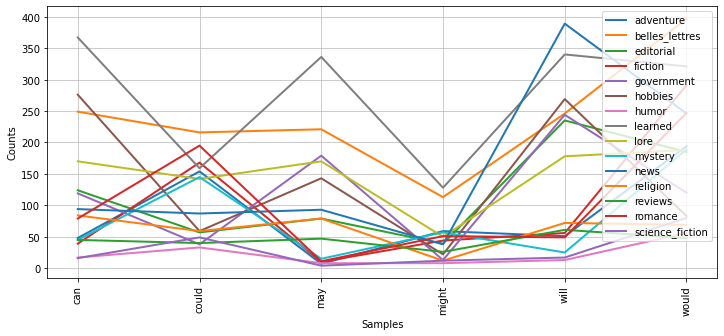

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [9]:
# plot: 결과를 그림(그래프)으로 만들어 줌
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
cfd1.plot()

### **`Inaugural`**
- 연설문 코퍼스

In [5]:
# import 하는 법
inaugural = nltk.corpus.inaugural

In [8]:
# inaugural에는 fileids()만 있음
inaugural.fileids() #연도-이름.txt 형식 | '2021-Biden.txt'

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [5]:
# 파일 출력해보기
inaugural.raw(fileids='2017-Trump.txt')

'Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans, and people of the world: Thank you.\n\nWe, the citizens of America, are now joined in a great national effort to rebuild our country and restore its promise for all of our people. Together, we will determine the course of America and the world for many, many years to come. We will face challenges, we will confront hardships, but we will get the job done.\n\nEvery 4 years, we gather on these steps to carry out the orderly and peaceful transfer of power, and we are grateful to President Obama and First Lady Michelle Obama for their gracious aid throughout this transition. They have been magnificent. Thank you.\n\nToday\'s ceremony, however, has very special meaning. Because today we are not merely transferring power from one administration to another or from one party to another, but we are transferring power from Washington, DC, and giving it back to you, the people.\n\nFor to

In [6]:
# ['america', 'citizen'] 빈도수를 cfd로 만드시오. 
# target_word = ['america', 'citizen']

cfd2 = nltk.ConditionalFreqDist(
    (fileid[:-4], target_word) #위치 바꾸면 x, y축 바뀜
    for fileid in inaugural.fileids()  
    for target_word in ['america', 'citizen'] #fileids
    
    for word in inaugural.words(fileids=fileid)
        if word.lower() == target_word
        #if word.lower().startswith(target_word)
        #if word.lower() in target_word
)
cfd2.tabulate()

                america citizen 
1793-Washington       1       0 
     1797-Adams       5       1 
    1817-Monroe       0       5 
    1821-Monroe       2       0 
     1825-Adams       0       1 
  1837-VanBuren       1       1 
  1841-Harrison       0      11 
    1853-Pierce       0       1 
  1857-Buchanan       1       0 
   1861-Lincoln       0       1 
     1869-Grant       0       2 
     1873-Grant       0       1 
     1877-Hayes       0       1 
  1881-Garfield       1       2 
 1885-Cleveland       0       5 
  1889-Harrison       0       3 
 1893-Cleveland       0       3 
      1909-Taft       4       0 
    1917-Wilson       2       0 
   1921-Harding      15       0 
  1925-Coolidge       8       2 
    1929-Hoover       6       2 
 1937-Roosevelt       1       1 
 1941-Roosevelt       7       1 
 1945-Roosevelt       1       0 
1953-Eisenhower       3       3 
1957-Eisenhower       5       0 
   1961-Kennedy       2       0 
   1965-Johnson       3       3 
     1969-

In [13]:
cfd2 = nltk.ConditionalFreqDist(
    (target_word, fileid[:-4])
    for fileid in inaugural.fileids()  
    for target_word in ['america', 'citizen'] #fileids
    
    for word in inaugural.words(fileids=fileid)
        if word.lower() == target_word
        #if word.lower().startswith(target_word)
        #if word.lower() in target_word
)

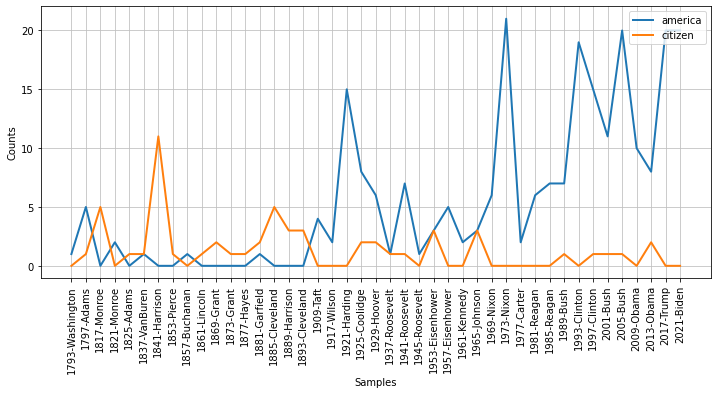

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [15]:
plt.figure(figsize=(12, 5))
cfd2.plot()

In [13]:
# 여전히 이렇게도 접근 가능
print(cfd2['2017-Trump']['america'])

# 이건 안 되네
print(cfd2['2017-Trump.txt']['we']) #['america', 'citizen']의 빈도수만 만들었기 때문

20
0


In [15]:
# cfd의 hapaxes()
cfd3 = nltk.ConditionalFreqDist(
    (file, word.lower())
    for file in inaugural.fileids()
    for word in inaugural.words(fileids=file)
)
for file in inaugural.fileids():
    print(f'{file} | {len(cfd3[file].hapaxes())}개')

1789-Washington.txt | 449개
1793-Washington.txt | 77개
1797-Adams.txt | 554개
1801-Jefferson.txt | 491개
1805-Jefferson.txt | 518개
1809-Madison.txt | 400개
1813-Madison.txt | 399개
1817-Monroe.txt | 616개
1821-Monroe.txt | 744개
1825-Adams.txt | 677개
1829-Jackson.txt | 396개
1833-Jackson.txt | 344개
1837-VanBuren.txt | 819개
1841-Harrison.txt | 1046개
1845-Polk.txt | 769개
1849-Taylor.txt | 364개
1853-Pierce.txt | 764개
1857-Buchanan.txt | 578개
1861-Lincoln.txt | 624개
1865-Lincoln.txt | 240개
1869-Grant.txt | 330개
1873-Grant.txt | 353개
1877-Hayes.txt | 518개
1881-Garfield.txt | 646개
1885-Cleveland.txt | 465개
1889-Harrison.txt | 845개
1893-Cleveland.txt | 587개
1897-McKinley.txt | 787개
1901-McKinley.txt | 585개
1905-Roosevelt.txt | 250개
1909-Taft.txt | 806개
1913-Wilson.txt | 434개
1917-Wilson.txt | 342개
1921-Harding.txt | 749개
1925-Coolidge.txt | 736개
1929-Hoover.txt | 594개
1933-Roosevelt.txt | 483개
1937-Roosevelt.txt | 458개
1941-Roosevelt.txt | 345개
1945-Roosevelt.txt | 189개
1949-Truman.txt | 467개
1953-Eis

---
## **Ch08. Tuple & List**
### **8.1 Tuple & List**
- 불변 객체(튜플) vs. 가변 객체(리스트)

#### **8.1.1 생성**

- 빈 튜플 & 리스트

In [18]:
# 빈 튜플 생성
empty = ()
emptyT = tuple()

# 빈 리스트 생성
emptyL = []
emptyL = list()

emptyT, emptyL

((), [])

- 요소 여러 개인 튜플 & 리스트

In [19]:
# 튜플: 요소 여러 개일 때
alphabetT = ('a', 'b')
alphabetT = 'a', 'b' #괄호 없이도 가능(선호)

# 리스트: 요소 여러 개일 때
alphabetL = ['a', 'b']


alphabetT, alphabetL

(('a', 'b'), ['a', 'b'])

- 요소 한 개인 튜플(주의!)

In [20]:
# 요소 1개일 때

## str: 그냥 괄호로만 감싸면 str이다.
alpha = ('a') 

## 쉼표 추가하여 튜플임을 명시
alphaT = ('b', )

type(alpha), type(alphaT)

(str, tuple)

#### **8.1.2 할당**

- **`packing`**: 한 변수에 `여러` 데이터 할당하는 것.
  - list, tuple 자체
  - e.g. a = [1, 2, 3, 4]
- **`unpacking`**: 한 변수에 여러 데이터가 들어 있을 때 `여러 변수에 나누는` 것
  - a='k', b='i', c='m'

In [21]:
#unpacking
a, b, c = 'kim' 
a, b, c

('k', 'i', 'm')

#### **8.1.3 교환**

In [22]:
pwd = 'abcd'
userID = 'sky'

#pwd = userID => 정보가 사라짐

# 임시변수(객체) 마련해서 교환
temp1 = userID
temp2 = pwd
pwd = temp1
userID = temp2

# 튜플 이용하여 교환
pwd, userID = userID, pwd
pwd, userID

('abcd', 'sky')

#### **8.1.4 연산**

- 더하기

In [25]:
('a', ) + (1, 2)

('a', 1, 2)

- 곱하기

In [26]:
(1, 2) * 3

(1, 2, 1, 2, 1, 2)

- 주의!

In [28]:
# 더했다고 x, y가 바뀌는 게 아님
# x + y != x => 주솟값이 다름

x = ('a', )
y = (1, 2)
id(x), id(x + y)

(1994014729168, 1993992682752)

- 비교

In [30]:
# 첫 인자부터 비교

x = 1, 2
y = 1, 6
x < y #두번째 인자에서 x = 2, y = 6이므로 True

True

In [26]:
# 원소 개수 다른 튜플의 비교
p = 2,
q = (2, 1, 0)
p <= q

#step1 : p[0], q[0] 비교 ▶ 5 == 5
#step2 : p[1], q[1] 비교 ▶ but, p[1]은 out-of-range, b[1]은 1, 따라서 a < b

True

#### **8.1.5 순회**

- 반복문

In [33]:
# for문 사용하기
x = (1, 2)
for i in x:
    print(x)

(1, 2)
(1, 2)


- list comprehension

In [34]:
#list comprehension에서도 사용 가능 -> 제일 좋음
[i for i in x] #리스트로 자료형이 바뀜

[1, 2]

- tuple comprehension은 없다!
  - list comprehension -> tuple 변환은 가능
  - 정말 필요할 때만 튜플로 바꾸자

In [35]:
# 1.
tuple([i for i in x])

#2.
*[i for i in x], # 방법 1보다 느림

(1, 2)

#### **8.1.6 형 변환**

- 하나하나 각각 들어가는 경우(주의!)

In [37]:
# 튜플 & 리스트
dog = 'dog'
tuple(dog), list(dog)

(('d', 'o', 'g'), ['d', 'o', 'g'])

- 통째로 형 변환하고 싶을 때

In [29]:
dog = 'dog'
(dog, ), [dog]

(('dog',), ['dog'])

#### **8.1.7 슬라이싱**

In [40]:
# 튜플도 슬라이싱 가능!
dog = 'dog'
dogT = tuple(dog)
dogT[0]

'd'

#### **8.1.8 정리**
- `tuple` 장점
  - 변하지 않는 데이터 시퀀스를 만들 수 있다. 타인의 접근 막음
    - 코드 만들어 뒀을 때 바뀌면 안 되는 값들...
  - 메모리 사용 적음
  - 튜플도 중복 데이터 사용 가능
- `list` 장점
  - tuple 장점 필요 없을 때 전부 리스트 사용
  - 데이터를 순차적으로 파악할 때
  - 중복 데이터 사용 가능 vs. set

### **8.2 리스트의 유용한 함수들**
- 변경, 삭제, 추가
- 리스트 컴프리핸션 업그레이드

In [64]:
num = list(range(5)) # 1 ~ 5 원소 담은 리스트 한 번에 만드는 법 => range() 이용하기
num

[0, 1, 2, 3, 4]

#### **8.2.1 추가**

- **`append(item)`**: 값 반환 안 함, 마지막에 요소 하나씩만 추가 가능

In [65]:
num.append(6) 
num

[0, 1, 2, 3, 4, 6]

- **`insert(index, item)`**: index 위치에 item 추가

In [66]:
num.insert(0, 8) # 0 위치에 8이라는 값 삽입하기
num

[8, 0, 1, 2, 3, 4, 6]

- **`extend(list)`**: 여러 개 추가(리스트를 리스트로 확장), 마지막에 추가됨

In [67]:
# 여러 개 추가(리스트를 리스트로 확장, 마지막에 추가) # 흡수(?)되는 것
num.extend([6, 6, 6])

k = [6, 6, 6]
# num.extend(k)

num

[8, 0, 1, 2, 3, 4, 6, 6, 6, 6]

In [68]:
# 리스트가 원소로 들어감 extend와 구분 주의 #통째로 추가되는 것
num.append(k) 
num

[8, 0, 1, 2, 3, 4, 6, 6, 6, 6, [6, 6, 6]]

In [69]:
# append와 구별!, extend()와 같은 효과(흡수)
num += k
num

[8, 0, 1, 2, 3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

#### **8.2.2 변경**

- `오프셋`으로 변경하기

In [70]:
num[0] = 9
num

[9, 0, 1, 2, 3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

- 슬라이스

In [71]:
num[:3] = 2, 2, 2
num

[2, 2, 2, 2, 3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

In [72]:
#string 넣었을 때, unpacking되어서 추가됨
num[:3] = 'cat' # a, b, c = 'cat'이나 똑같음
num 

['c', 'a', 't', 2, 3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

#### **8.2.3 삭제**

- **`del`**

In [73]:
del num[:3] #범위 정해서 삭제 가능
num

[2, 3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

- **`remove(value)`**: 특정 값 삭제

In [74]:
num.remove(2) #2 삭제
num

[3, 4, 6, 6, 6, 6, [6, 6, 6], 6, 6, 6]

In [31]:
# 삭제할 값이 여러 개 있을 땐?
test = [2, 2, 5, 6, 7, 8, 2]
test.remove(2)
test
# 제일 먼저 탐지된 값만 삭제함

[2, 5, 6, 7, 8, 2]

- **`pop(index)`**: index 위치에 있는 항목 삭제
  -  기본값 = -1(최후단에서 삭제)

In [75]:
num.pop(1) #num[1] 위치에 있는 4 삭제됨
num.pop() # 맨 끝(num[-1]) 요소 삭제됨
num

[3, 6, 6, 6, 6, [6, 6, 6], 6, 6]

- **`clear()`**: 리스트 내 모든 요소 삭제. 빈 리스트 만듦

In [76]:
num.clear()  # num = []과 같음
num

[]

#### **8.2.4 탐색**

- **`index(value)`**

In [1]:
num = list(range(5))
num.index(4) # 못 찾으면 오류 발생

4

- 멤버십 연산자 **`in`**

In [2]:
0 in num

True

#### **8.2.5 정렬**

- **`sort()`**  **`sorted()`**

In [3]:
# sorted(list)
sorted(num, reverse=True) #변한 값만 복사해서 출력

[4, 3, 2, 1, 0]

In [4]:
num # 실제 리스트는 변하지 않음. 할당해야 비로소 변함

[0, 1, 2, 3, 4]

In [5]:
# list.sort()
num.sort(reverse=True) # 리스트 변함, 값을 할당하지 않아도 됨

In [6]:
num # 할당 안 했는데도 변했다!

[4, 3, 2, 1, 0]

- **`reverse()`**  **`reversed()`**

In [9]:
# list.reverse()
num.reverse()
num

[0, 1, 2, 3, 4]

In [12]:
# reversed(list)
reversed(num)
num # 원본 리스트는 변하지 않음

[0, 1, 2, 3, 4]

#### **8.2.6 복사**

- 할당

In [13]:
a = list(range(1, 5))
b = a #같은 메모리 참조하므로 요소의 값 변경 시 같이 변함
b[0] = 6
a, b #둘 다 변함

([6, 2, 3, 4], [6, 2, 3, 4])

In [14]:
id(a), id(b) # 참조하는 곳이 같음

(2049719915648, 2049719915648)

- **`shallow copy`** | 얕은 복사
  - 참조하지 않고 새로운 객체에 할당

In [15]:
# 1. lst.copy()
c = a.copy()

# 2. list(lst)
d = list(a)

# 3. lst[:]
e = a[:]

id(a), id(c), id(d), id(e) #모두 다른 객체

(2049719915648, 2049720673536, 2049720417920, 2049720683008)

In [18]:
#얕은 복사 문제점
a.append([1, 2, 3])
a #리스트 내 요소가 가변객체일 때, 얕은 복사 시 그 요소 변경하면 같이 변경됨

[6, 2, 3, 4, [1, 2, 3]]

In [19]:
f = a.copy()
id(a), id(f)  # 객체의 주소는 다르지만

(2049719915648, 2049721110336)

In [20]:
f[-1][0] = 9
a, f          #[[1, 2, 3]] -> [[9, 2, 3]] 가변객체 요소 변경하면 같이 변경됨

([6, 2, 3, 4, [9, 2, 3]], [6, 2, 3, 4, [9, 2, 3]])

- **`deep copy`** | 깊은 복사
  - 하위에 중첩된 리스트 요소까지 바뀌지 않도록 복사

In [21]:
import copy
g = copy.deepcopy(a)
g

[6, 2, 3, 4, [9, 2, 3]]

In [22]:
g[-1][0] = 10
a, g      #바뀌지 않는다!

([6, 2, 3, 4, [9, 2, 3]], [6, 2, 3, 4, [10, 2, 3]])

#### **8.2.7 순회**

- **`zip()`**

In [23]:
name = ['kate', 'royce', 'phill']
age = [77, 44, 54]
#age = [77, 44, 54, 22] 한쪽 리스트 요소가 더 많을 경우, 짧은 걸 기준으로 끝남

#(name, age)
for i1, i2 in zip(name, age): #여러 리스트 동시 순회
    print((i1, i2)) #두 개 리스트 요소를 묶음으로 만들어줌

('kate', 77)
('royce', 44)
('phill', 54)


In [24]:
# 중첩 for문과는 다름
for i1 in name:
    for i2 in age:
        print((i1, i2))

('kate', 77)
('kate', 44)
('kate', 54)
('royce', 77)
('royce', 44)
('royce', 54)
('phill', 77)
('phill', 44)
('phill', 54)


In [25]:
# list로 관리하기
list(zip(name, age))

[('kate', 77), ('royce', 44), ('phill', 54)]

- **`enumerate()`**: 인덱스가 필요할 때

In [26]:
for idx, item in enumerate(name):
    print(item, idx)

kate 0
royce 1
phill 2


### **8.3 리스트 컴프리핸션 업그레이드**

In [30]:
name = ['kate', 'royce', 'phill']
age = [77, 44, 54]

In [31]:
#list(zip(name, age)) -> 리스트 컴프리핸션
[(i, j) for i, j in zip(name, age)]

[('kate', 77), ('royce', 44), ('phill', 54)]

In [32]:
#name, age 이용해 새로운 리스트 생성, (이름, 나이) 형식, for문 사용

#ver. 1
new = []
for i in range(len(list(zip(name, age)))):
    elem = (name[i], age[i])
    new.append(elem)
print(new)

#ver. 2
new.clear()
for i, j in zip(name, age):
    new.append((i, j))
print(new)

[('kate', 77), ('royce', 44), ('phill', 54)]
[('kate', 77), ('royce', 44), ('phill', 54)]


In [33]:
# 1. for문 -> 리스트 컴프리핸션으로 바꾸기

''' 
for i in name:
    for j in age:
        print(i, j)
'''
'''예시 출력
 ('kate', 77),
 ('kate', 44),
 ('kate', 54),
...
'''

[(i, j) for i in name for j in age]

[('kate', 77),
 ('kate', 44),
 ('kate', 54),
 ('royce', 77),
 ('royce', 44),
 ('royce', 54),
 ('phill', 77),
 ('phill', 44),
 ('phill', 54)]

In [35]:
#2. [i, j] 리스트의 리스트로 바꿔보기 (리스트 컴프리핸션 사용)

'''
result = []
for j in age:
    empty = []
    for i in name:
        empty.append((i ,j))
    result.append(empty)
'''

'''예시 출력
[[('kate', 77), ('royce', 77), ('phill', 77)],
 [('kate', 44), ('royce', 44), ('phill', 44)],
 [('kate', 54), ('royce', 54), ('phill', 54)]]
'''

# name 기준 출력
print([[(i, j) for j in age] for i in name])

# age 기준 출력
print([[(i, j) for i in name] for j in age])

[[('kate', 77), ('kate', 44), ('kate', 54)], [('royce', 77), ('royce', 44), ('royce', 54)], [('phill', 77), ('phill', 44), ('phill', 54)]]
[[('kate', 77), ('royce', 77), ('phill', 77)], [('kate', 44), ('royce', 44), ('phill', 44)], [('kate', 54), ('royce', 54), ('phill', 54)]]


In [41]:
# 각 단어별로 [(대문자, 첫글자 대문자, 글자수), ...] 리스트 만들기
sentence = 'do not judge a book by its cover'

[(word.upper(), word.capitalize(), len(word)) for word in sentence.split()]

[('DO', 'Do', 2),
 ('NOT', 'Not', 3),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

In [46]:
text = [['Sunja', 'said', 'goodnight', 'to', 'her', 'mother'],
       ['Hansu', 'was', 'no', 'no', 'longer', 'in', 'busan']]

#1. 문장마다 스트링으로 변환해서 리스트로 반환
print([' '.join(word) for word in text], end='\n\n')
  # ' '.join(['Sunja', 'said', ..., 'mother'])
    
#2. 전체를 스트링으로 반환
print(' '.join([' '.join(word) for word in text]), end='\n\n')

#3. 전체 단어 리스트 가져오기
print([word for sent in text 
            for word in sent])

['Sunja said goodnight to her mother', 'Hansu was no no longer in busan']

Sunja said goodnight to her mother Hansu was no no longer in busan

['Sunja', 'said', 'goodnight', 'to', 'her', 'mother', 'Hansu', 'was', 'no', 'no', 'longer', 'in', 'busan']


In [48]:
# if문 - else: 조건식을 앞으로 끌고 온다!

## 짝수면 가져오고, 홀수면 '홀수'
[i if i%2==0 else '홀수' for i in range(10)]

[0, '홀수', 2, '홀수', 4, '홀수', 6, '홀수', 8, '홀수']

---

### **brown corpus - romance 정제하기**

- 문장 분절 [[they, neither, ...], [], ...]
- 문장 분절 -> 단어 분절
- 불필요한 것들 제거
    - 문장부호, POS 제거
    -'(어포스트로피) 분절: she's => she, 's // don't => do, 'nt
    - 하이픈 분절

In [32]:
import nltk
nltk.download('brown')
brown = nltk.corpus.brown
brown.raw(categories='romance')[:5000]
### 과제 제출 완료 ###

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\여혜인\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


"\n\n\tThey/ppss neither/cc liked/vbd nor/cc disliked/vbd the/at Old/jj-tl Man/nn-tl ./.\nTo/in them/ppo he/pps could/md have/hv been/ben the/at broken/vbn bell/nn in/in the/at church/nn tower/nn which/wdt rang/vbd before/in and/cc after/in Mass/nn-tl ,/, and/cc at/in noon/nn ,/, and/cc at/in six/cd each/dt evening/nn --/-- its/pp$ tone/nn ,/, repetitive/jj ,/, monotonous/jj ,/, never/rb breaking/vbg the/at boredom/nn of/in the/at streets/nns ./.\nThe/at Old/jj-tl Man/nn-tl was/bedz unimportant/jj ./.\n\n\n\tYet/rb if/cs he/pps were/bed not/* there/rb ,/, they/ppss would/md have/hv missed/vbn him/ppo ,/, as/cs they/ppss would/md have/hv missed/vbn the/at sounds/nns of/in bees/nns buzzing/vbg against/in the/at screen/nn door/nn in/in early/jj June/np ;/. ;/.\nor/cc the/at smell/nn of/in thick/jj tomato/nn paste/nn --/-- the/at ripe/jj smell/nn that/wps was/bedz both/abx sweet/jj and/cc sour/jj --/-- rising/vbg up/rp from/in aluminum/nn trays/nns wrapped/vbn in/in fly-dotted/jj cheeseclo

---

## **Review**

### **새롭게 알게 된 내용**

- 특정 단어들의 cfd 만들기
- tabulate() 사용법
- 튜플, 리스트 uncasing
- zip(), enumerate()
- 리스트 컴프리핸션 if-else 사용법(앞쪽으로 빼기)